In [1]:
import numpy as np
import itertools
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from PIL import Image
import matplotlib.pyplot as plt
from graphillion import GraphSet

from fragenum import molenum
from fragenum import mol_helper
# GraphSet.converters["to_graph"]=nx.Graph
# GraphSet.converters["to_edges"]=nx.Graph.edges

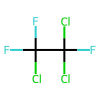

In [2]:
mol=Chem.MolFromSmiles("C(C(F)(Cl)Cl)(F)(F)Cl")
mol=Chem.AddHs(mol)
display(Draw.MolToImage(mol,size=(100,100)))

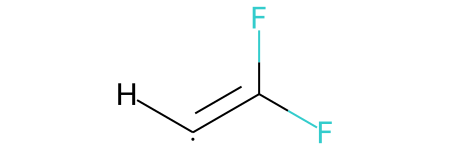

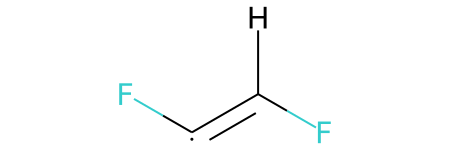

In [3]:
str_atm_list=["C","C","F","F","H"]

span_mol_enum=molenum.SpanMolEnum()
span_mol_enum.set_atm_list(str_atm_list=str_atm_list)
span_mol_enum.generate_mol()

for smi in span_mol_enum.smi_set:
    mol=mol_helper.smi_to_mol(smi)
    display(mol)

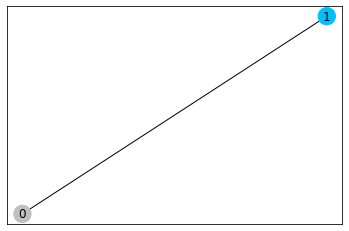

In [7]:
span_mol_enum.iter_display_graph()

In [5]:


span_mol_enum=molenum.SpanMolEnum()


In [5]:
span_mol_enum.set_mol(mol)
span_mol_enum.enumerate()

combinations: 20


In [6]:
span_mol_enum.narrow_candidate()

In [14]:
10>3 and 22>4

False

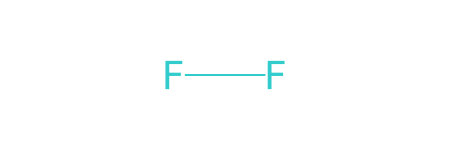

In [7]:
from fragenum import mol_helper

for smi in span_mol_enum.smi_set:
    mol=mol_helper.smi_to_mol(smi)
    display(mol)

In [12]:
span_mol_enum.iter_display_graph()

In [6]:
from fragenum import molenum

str_atm_list=["H","F"]

span_mol_enum=molenum.SpanMolEnum()
span_mol_enum.set_atm_list(str_atm_list=str_atm_list)
span_mol_enum.generate_mol()

combinations: 1
narrowed combinations: 1
generated mols: 1


In [13]:

c_cand=tuple(range(3))
h_cand=tuple(range(4))
f_cand=tuple(range(4))
cl_cand=tuple(range(2))
comb_list=[c_cand,h_cand,f_cand,cl_cand]

comb_no=0
comb_iter=itertools.product(*comb_list)


In [27]:
(c_num+1)*(h_num+1)*(f_num+1)*(cl_num+1)

288

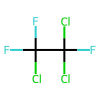

In [4]:
mol=Chem.MolFromSmiles("C(C(F)(Cl)Cl)(F)(F)Cl")
mol=Chem.AddHs(mol)
display(Draw.MolToImage(mol,size=(100,100)))

In [20]:
atm_str_list=[]
atm_strs=["C","H","F","Cl"]
for atm in mol.GetAtoms():
    atm_str_list.append(atm.GetSymbol())

atm_num_array=np.zeros(4)
comb_list=[]
for i,atm_str in enumerate(atm_strs):
    atm_num=atm_str_list.count(atm_str)
    atm_num_array[i]=atm_num
    comb_list.append(range(atm_num+1))

comb_iter=itertools.product(*comb_list)
for comb in comb_iter:
    print(atm_num_array-comb)

[2. 0. 3. 3.]
[2. 0. 3. 2.]
[2. 0. 3. 1.]
[2. 0. 3. 0.]
[2. 0. 2. 3.]
[2. 0. 2. 2.]
[2. 0. 2. 1.]
[2. 0. 2. 0.]
[2. 0. 1. 3.]
[2. 0. 1. 2.]
[2. 0. 1. 1.]
[2. 0. 1. 0.]
[2. 0. 0. 3.]
[2. 0. 0. 2.]
[2. 0. 0. 1.]
[2. 0. 0. 0.]
[1. 0. 3. 3.]
[1. 0. 3. 2.]
[1. 0. 3. 1.]
[1. 0. 3. 0.]
[1. 0. 2. 3.]
[1. 0. 2. 2.]
[1. 0. 2. 1.]
[1. 0. 2. 0.]
[1. 0. 1. 3.]
[1. 0. 1. 2.]
[1. 0. 1. 1.]
[1. 0. 1. 0.]
[1. 0. 0. 3.]
[1. 0. 0. 2.]
[1. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 3. 3.]
[0. 0. 3. 2.]
[0. 0. 3. 1.]
[0. 0. 3. 0.]
[0. 0. 2. 3.]
[0. 0. 2. 2.]
[0. 0. 2. 1.]
[0. 0. 2. 0.]
[0. 0. 1. 3.]
[0. 0. 1. 2.]
[0. 0. 1. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 3.]
[0. 0. 0. 2.]
[0. 0. 0. 1.]
[0. 0. 0. 0.]


array([0, 0, 0, 0])

In [11]:
comb_list

[range(0, 2), range(0, 0), range(0, 3), range(0, 3)]

In [23]:
atm_str_list

['C', 'C', 'F', 'Cl', 'Cl', 'F', 'F', 'Cl']

In [25]:
atm_num_list

[2, 0, 3, 3]

In [22]:
atm_strs=["C","H","F","Cl"]
c_num=3
h_num=8
f_num=8
cl_num=4

c_cand=tuple(range(c_num+1))
h_cand=tuple(range(h_num+1))
f_cand=tuple(range(f_num+1))
cl_cand=tuple(range(cl_num+1))
comb_list=[c_cand,h_cand,f_cand,cl_cand]

print("combinations :",(c_num+1)*(h_num+1)*(f_num+1)*(cl_num+1))

comb_no=0
comb_iter=itertools.product(*comb_list)
span_mol_dict=dict()
for comb in comb_iter:
    if comb_no==3000:
        break
    comb_no+=1

    str_atm_list=[]
    for i,repeat in enumerate(comb):
        str_atm_list.extend(
            [atm_strs[i]]*repeat)
    formula=""
    for i in range(4):
        formula += str(atm_strs[i])+str(comb[i])
    
    span_mol_enum=molenum.SpanMolEnum()
    span_mol_enum.set_atm_list(str_atm_list=str_atm_list)
    span_mol_enum.generate_mol()
    span_mol_dict[comb]=span_mol_enum.smi_set
    print("{:0=5} {} : {}".format(
        comb_no,
        formula,
        len(span_mol_enum.smi_set)))

combinations : 1620
00001 C0H0F0Cl0 : 0
00002 C0H0F0Cl1 : 1
00003 C0H0F0Cl2 : 1
00004 C0H0F0Cl3 : 0
00005 C0H0F0Cl4 : 0
00006 C0H0F1Cl0 : 1
00007 C0H0F1Cl1 : 1
00008 C0H0F1Cl2 : 0
00009 C0H0F1Cl3 : 0
00010 C0H0F1Cl4 : 0
00011 C0H0F2Cl0 : 1
00012 C0H0F2Cl1 : 0
00013 C0H0F2Cl2 : 0
00014 C0H0F2Cl3 : 0
00015 C0H0F2Cl4 : 0
00016 C0H0F3Cl0 : 0
00017 C0H0F3Cl1 : 0
00018 C0H0F3Cl2 : 0
00019 C0H0F3Cl3 : 0
00020 C0H0F3Cl4 : 0
00021 C0H0F4Cl0 : 0
00022 C0H0F4Cl1 : 0
00023 C0H0F4Cl2 : 0
00024 C0H0F4Cl3 : 0
00025 C0H0F4Cl4 : 0
00026 C0H0F5Cl0 : 0
00027 C0H0F5Cl1 : 0
00028 C0H0F5Cl2 : 0
00029 C0H0F5Cl3 : 0
00030 C0H0F5Cl4 : 0
00031 C0H0F6Cl0 : 0
00032 C0H0F6Cl1 : 0
00033 C0H0F6Cl2 : 0
00034 C0H0F6Cl3 : 0
00035 C0H0F6Cl4 : 0
00036 C0H0F7Cl0 : 0
00037 C0H0F7Cl1 : 0
00038 C0H0F7Cl2 : 0
00039 C0H0F7Cl3 : 0
00040 C0H0F7Cl4 : 0
00041 C0H0F8Cl0 : 0
00042 C0H0F8Cl1 : 0
00043 C0H0F8Cl2 : 0
00044 C0H0F8Cl3 : 0
00045 C0H0F8Cl4 : 0
00046 C0H1F0Cl0 : 1
00047 C0H1F0Cl1 : 1
00048 C0H1F0Cl2 : 0
00049 C0H1F0Cl3 : 0


00446 C1H0F8Cl0 : 0
00447 C1H0F8Cl1 : 0
00448 C1H0F8Cl2 : 0
00449 C1H0F8Cl3 : 0
00450 C1H0F8Cl4 : 0
00451 C1H1F0Cl0 : 1
00452 C1H1F0Cl1 : 1
00453 C1H1F0Cl2 : 1
00454 C1H1F0Cl3 : 1
00455 C1H1F0Cl4 : 0
00456 C1H1F1Cl0 : 1
00457 C1H1F1Cl1 : 1
00458 C1H1F1Cl2 : 1
00459 C1H1F1Cl3 : 0
00460 C1H1F1Cl4 : 0
00461 C1H1F2Cl0 : 1
00462 C1H1F2Cl1 : 1
00463 C1H1F2Cl2 : 0
00464 C1H1F2Cl3 : 0
00465 C1H1F2Cl4 : 0
00466 C1H1F3Cl0 : 1
00467 C1H1F3Cl1 : 0
00468 C1H1F3Cl2 : 0
00469 C1H1F3Cl3 : 0
00470 C1H1F3Cl4 : 0
00471 C1H1F4Cl0 : 0
00472 C1H1F4Cl1 : 0
00473 C1H1F4Cl2 : 0
00474 C1H1F4Cl3 : 0
00475 C1H1F4Cl4 : 0
00476 C1H1F5Cl0 : 0
00477 C1H1F5Cl1 : 0
00478 C1H1F5Cl2 : 0
00479 C1H1F5Cl3 : 0
00480 C1H1F5Cl4 : 0
00481 C1H1F6Cl0 : 0
00482 C1H1F6Cl1 : 0
00483 C1H1F6Cl2 : 0
00484 C1H1F6Cl3 : 0
00485 C1H1F6Cl4 : 0
00486 C1H1F7Cl0 : 0
00487 C1H1F7Cl1 : 0
00488 C1H1F7Cl2 : 0
00489 C1H1F7Cl3 : 0
00490 C1H1F7Cl4 : 0
00491 C1H1F8Cl0 : 0
00492 C1H1F8Cl1 : 0
00493 C1H1F8Cl2 : 0
00494 C1H1F8Cl3 : 0
00495 C1H1F8Cl4 : 0


00862 C2H1F1Cl1 : 3
00863 C2H1F1Cl2 : 2
00864 C2H1F1Cl3 : 4
00865 C2H1F1Cl4 : 2
00866 C2H1F2Cl0 : 2
00867 C2H1F2Cl1 : 2
00868 C2H1F2Cl2 : 5
00869 C2H1F2Cl3 : 3
00870 C2H1F2Cl4 : 0
00871 C2H1F3Cl0 : 1
00872 C2H1F3Cl1 : 4
00873 C2H1F3Cl2 : 3
00874 C2H1F3Cl3 : 0
00875 C2H1F3Cl4 : 0
00876 C2H1F4Cl0 : 2
00877 C2H1F4Cl1 : 2
00878 C2H1F4Cl2 : 0
00879 C2H1F4Cl3 : 0
00880 C2H1F4Cl4 : 0
00881 C2H1F5Cl0 : 1
00882 C2H1F5Cl1 : 0
00883 C2H1F5Cl2 : 0
00884 C2H1F5Cl3 : 0
00885 C2H1F5Cl4 : 0
00886 C2H1F6Cl0 : 0
00887 C2H1F6Cl1 : 0
00888 C2H1F6Cl2 : 0
00889 C2H1F6Cl3 : 0
00890 C2H1F6Cl4 : 0
00891 C2H1F7Cl0 : 0
00892 C2H1F7Cl1 : 0
00893 C2H1F7Cl2 : 0
00894 C2H1F7Cl3 : 0
00895 C2H1F7Cl4 : 0
00896 C2H1F8Cl0 : 0
00897 C2H1F8Cl1 : 0
00898 C2H1F8Cl2 : 0
00899 C2H1F8Cl3 : 0
00900 C2H1F8Cl4 : 0
00901 C2H2F0Cl0 : 1
00902 C2H2F0Cl1 : 2
00903 C2H2F0Cl2 : 2
00904 C2H2F0Cl3 : 3
00905 C2H2F0Cl4 : 2
00906 C2H2F1Cl0 : 2
00907 C2H2F1Cl1 : 2
00908 C2H2F1Cl2 : 5
00909 C2H2F1Cl3 : 3
00910 C2H2F1Cl4 : 0
00911 C2H2F2Cl0 : 2


01274 C3H1F2Cl3 : 20
01275 C3H1F2Cl4 : 23
01276 C3H1F3Cl0 : 6
01277 C3H1F3Cl1 : 19
01278 C3H1F3Cl2 : 20
01279 C3H1F3Cl3 : 27
01280 C3H1F3Cl4 : 12
01281 C3H1F4Cl0 : 8
01282 C3H1F4Cl1 : 13
01283 C3H1F4Cl2 : 23
01284 C3H1F4Cl3 : 12
01285 C3H1F4Cl4 : 0
01286 C3H1F5Cl0 : 5
01287 C3H1F5Cl1 : 13
01288 C3H1F5Cl2 : 9
01289 C3H1F5Cl3 : 0
01290 C3H1F5Cl4 : 0
01291 C3H1F6Cl0 : 5
01292 C3H1F6Cl1 : 5
01293 C3H1F6Cl2 : 0
01294 C3H1F6Cl3 : 0
01295 C3H1F6Cl4 : 0
01296 C3H1F7Cl0 : 2
01297 C3H1F7Cl1 : 0
01298 C3H1F7Cl2 : 0
01299 C3H1F7Cl3 : 0
01300 C3H1F7Cl4 : 0
01301 C3H1F8Cl0 : 0
01302 C3H1F8Cl1 : 0
01303 C3H1F8Cl2 : 0
01304 C3H1F8Cl3 : 0
01305 C3H1F8Cl4 : 0
01306 C3H2F0Cl0 : 1
01307 C3H2F0Cl1 : 5
01308 C3H2F0Cl2 : 8
01309 C3H2F0Cl3 : 12
01310 C3H2F0Cl4 : 9
01311 C3H2F1Cl0 : 5
01312 C3H2F1Cl1 : 12
01313 C3H2F1Cl2 : 24
01314 C3H2F1Cl3 : 20
01315 C3H2F1Cl4 : 23
01316 C3H2F2Cl0 : 8
01317 C3H2F2Cl1 : 24
01318 C3H2F2Cl2 : 27
01319 C3H2F2Cl3 : 35
01320 C3H2F2Cl4 : 16
01321 C3H2F3Cl0 : 12
01322 C3H2F3Cl1 : 20

In [37]:
import pickle
with open("ProcessedData/3884_smilies.pkl","wb") as f:
    pickle.dump(span_mol_dict,f)

In [35]:
span_mol_dict[(2,2,2,1)]

{'[H]C([H])(Cl)[C](F)F',
 '[H]C([H])(F)[C](F)Cl',
 '[H][C](Cl)C([H])(F)F',
 '[H][C](F)C([H])(F)Cl',
 '[H][C]([H])C(F)(F)Cl'}

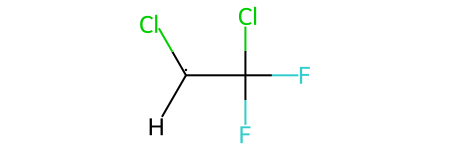

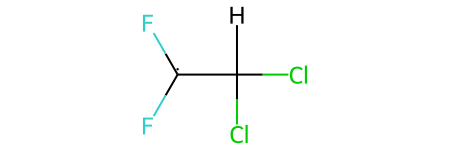

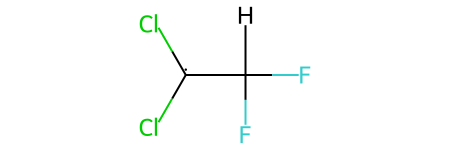

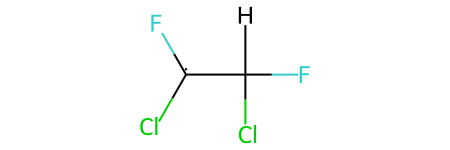

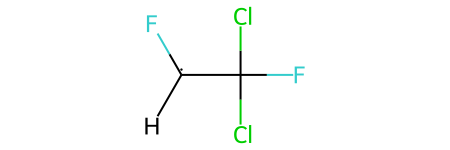

In [9]:
for smi in span_mol_dict[(2,1,2,2)]:
    mol=mol_helper.smi_to_mol(smi)
    display(mol)

In [35]:
print("{:0=5} {} : {}".format(
    comb_no,
    formula,
    len(span_mol_enum.smi_set)))

00288 C3H5F5Cl1 : 0


In [18]:
len(l_l_base)

20

In [31]:
#原子番号のリストをarray化
atomic_no_array=np.array(span_mol_enum.atomic_no_list)
#原子のリストのユニークな要素を取り出し
ar_uni=np.unique(span_mol_enum.atomic_no_list)
uni_atm_num=len(ar_uni)

#原子リストのうち、注目している原子種と一致するところをbooleanで取り出す
aten_atm_bool=[]
for atm_no in ar_uni:
    aten_atm_bool.append(atomic_no_array==atm_no)
    
l_c_table=[]
l_cons_b=[]
for i in range(paths_num):
    l_sorted=[]
    for j in range(uni_atm_num):
        #booleanで取り出してsortし、原子種ごとにカノニカルラベルを作成
        #それをリストに追加し、グラフ全体のカノニカルラベルとする。
        l_sorted.extend(np.sort(ar_base[i][aten_atm_bool[j]]))
    if l_sorted not in l_c_table:
        #そのグラフ全体のカノニカルラベルがチェック表になければ、追加
        l_c_table.append(l_sorted)
        #カノニカルラベルがユニークなもののindexを追加
        l_cons_b.append(i)

In [73]:
new_bnd_mtx=bond_mtx.copy()

In [126]:
mtx_num=10000
mtx_width=8
test_mtx=np.random.randint(0,10,size=[mtx_num,mtx_width,mtx_width])
test_mtx=np.tril(test_mtx)
# test_mtx

In [123]:
%%time
for i in range(mtx_num):
    for j in range(mtx_width):
        test_mtx[i,:j,j]=test_mtx[i,j,:j]

CPU times: user 62.4 ms, sys: 0 ns, total: 62.4 ms
Wall time: 60.2 ms


In [127]:
%%time
test_mtx=test_mtx+test_mtx.transpose(0,2,1)

CPU times: user 1.71 ms, sys: 752 µs, total: 2.47 ms
Wall time: 1.22 ms


In [107]:
test_mtx[0]

array([[ 0,  2,  3,  9,  0,  8,  8,  1],
       [ 2, 12,  7,  6,  9,  3,  2,  1],
       [ 3,  7, 18,  9,  8,  8,  4,  3],
       [ 9,  6,  9,  2,  7,  6,  4,  9],
       [ 0,  9,  8,  7, 18,  4,  6,  9],
       [ 8,  3,  8,  6,  4,  0,  2,  5],
       [ 8,  2,  4,  4,  6,  2,  0,  4],
       [ 1,  1,  3,  9,  9,  5,  4,  4]])

In [71]:
new_bnd_mtx=bond_mtx[l_cons_b]
new_bnd_mtx+new_bnd_mtx.transpose(0,2,1)

array([[[0, 1, 1, 1, 1, 0, 0, 0],
        [1, 0, 0, 0, 0, 1, 1, 1],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0]],

       [[0, 1, 1, 1, 0, 1, 0, 0],
        [1, 0, 0, 0, 1, 0, 1, 1],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0]],

       [[0, 1, 1, 0, 0, 1, 1, 0],
        [1, 0, 0, 1, 1, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0]],

       [[0, 1, 0, 0, 0, 1, 1, 1],
        [1, 0, 1, 1, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        

In [28]:
l_sorted

[0, 78125, 64, 64, 64, 128, 128, 128]

array([False, False, False, False, False,  True,  True,  True])

In [21]:
l_cons_b

[0, 1, 7, 19]

In [22]:
l_l_base

[[0, 78125, 128, 128, 128, 64, 64, 64],
 [0, 78125, 128, 128, 64, 128, 64, 64],
 [0, 78125, 128, 128, 64, 64, 128, 64],
 [0, 78125, 128, 128, 64, 64, 64, 128],
 [0, 78125, 128, 64, 128, 128, 64, 64],
 [0, 78125, 128, 64, 128, 64, 128, 64],
 [0, 78125, 128, 64, 128, 64, 64, 128],
 [0, 78125, 128, 64, 64, 128, 128, 64],
 [0, 78125, 128, 64, 64, 128, 64, 128],
 [0, 78125, 128, 64, 64, 64, 128, 128],
 [0, 78125, 64, 128, 128, 128, 64, 64],
 [0, 78125, 64, 128, 128, 64, 128, 64],
 [0, 78125, 64, 128, 128, 64, 64, 128],
 [0, 78125, 64, 128, 64, 128, 128, 64],
 [0, 78125, 64, 128, 64, 128, 64, 128],
 [0, 78125, 64, 128, 64, 64, 128, 128],
 [0, 78125, 64, 64, 128, 128, 128, 64],
 [0, 78125, 64, 64, 128, 128, 64, 128],
 [0, 78125, 64, 64, 128, 64, 128, 128],
 [0, 78125, 64, 64, 64, 128, 128, 128]]

In [59]:
bond_mtx[2,:,:]

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0]])

In [8]:
from fragenum import mol_helper

for smi in smi_set:
    mol=mol_helper.smi_to_mol(smi)
    display(mol)

NameError: name 'smi_set' is not defined

In [6]:
for path in span_mol_enum.paths:
    break
    
type(path)

list

In [39]:
type(span_mol_enum.paths)

graphillion.graphset.GraphSet

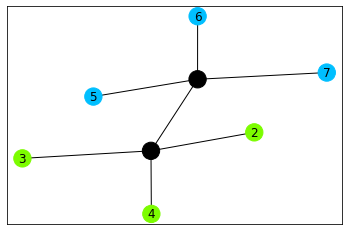

In [34]:
for path in span_mol_enum.paths:
    break

node_color=[]
for node in path.nodes:
    node_color.append(
        span_mol_enum.atm_colors_list[node])
f, ax = plt.subplots()
nx.draw_networkx(
    path,
    node_color=node_color,
    with_labels=True,
    ax=ax)

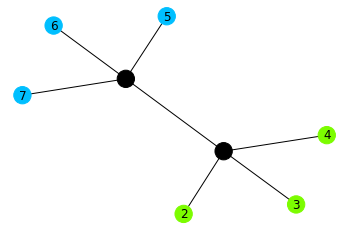

In [27]:
f

NoneType

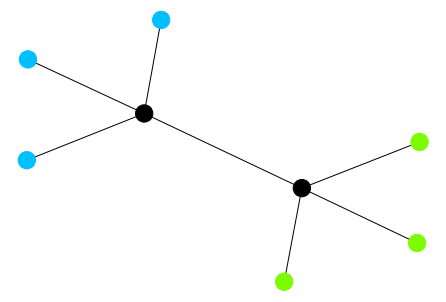

In [16]:
im=nx.draw(
    path,
    node_color=node_color)